In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/MyDrive/CSC532/dataset/dataset1.zip"


เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
 extracting: dataset1/train/sad/Sad-370.jpg  
 extracting: dataset1/train/sad/Sad-3700.jpg  
 extracting: dataset1/train/sad/Sad-3701.jpg  
 extracting: dataset1/train/sad/Sad-3702.jpg  
 extracting: dataset1/train/sad/Sad-3703.jpg  
 extracting: dataset1/train/sad/Sad-3704.jpg  
 extracting: dataset1/train/sad/Sad-3705.jpg  
 extracting: dataset1/train/sad/Sad-3706.jpg  
 extracting: dataset1/train/sad/Sad-3707.jpg  
 extracting: dataset1/train/sad/Sad-3708.jpg  
 extracting: dataset1/train/sad/Sad-3709.jpg  
 extracting: dataset1/train/sad/Sad-371.jpg  
 extracting: dataset1/train/sad/Sad-3710.jpg  
 extracting: dataset1/train/sad/Sad-3711.jpg  
 extracting: dataset1/train/sad/Sad-3712.jpg  
 extracting: dataset1/train/sad/Sad-3713.jpg  
 extracting: dataset1/train/sad/Sad-3714.jpg  
 extracting: dataset1/train/sad/Sad-3715.jpg  
 extracting: dataset1/train/sad/Sad-3716.jpg  
 extracting: dataset1/train/sad/Sad-3717.jpg  
 extr

In [ ]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import pandas as pd
from glob import glob

classe = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']
classes_num = dict(zip(classe, range(len(classe))))
dataset_path = 'dataset1/train'

dataset_train = pd.DataFrame(dict(filename = glob(dataset_path + '/**/**')))
dataset_train['classname'] = dataset_train['filename'].str.split('/', expand=True)[2]
dataset_train['class'] = dataset_train['classname'].map(lambda name: str(classes_num[name]))
dataset_train = dataset_train.sample(random_state=244, frac=1)
dataset_train

,filename,classname,class
15990,dataset1/train/angry/Angry-2402.jpg,angry,0
13286,dataset1/train/angry/Angry-1430.jpg,angry,0
7030,dataset1/train/neutral/Neutral-4190.jpg,neutral,3
25620,dataset1/train/sad/Sad-712.jpg,sad,4
25521,dataset1/train/sad/Sad-2246.jpg,sad,4
...,...,...,...
2523,dataset1/train/surprise/Suprise-10.jpg,surprise,5
24957,dataset1/train/sad/Sad-4446.jpg,sad,4
19400,dataset1/train/happy/Happy-6831.jpg,happy,2
14472,dataset1/train/angry/Angry-1482.jpg,angry,0


In [ ]:
classes2 = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']
classes2_num = dict(zip(classes2, range(len(classes2))))
dataset2_path = 'dataset1/test'

dataset_test = pd.DataFrame(dict(filename = glob(dataset2_path + '/**/**')))
dataset_test['classname'] = dataset_test['filename'].str.split('/', expand=True)[2]
dataset_test['class'] = dataset_test['classname'].map(lambda name: str(classes2_num[name]))
dataset_test = dataset_test.sample(random_state=244, frac=1)
dataset_test

,filename,classname,class
2501,dataset1/test/fear/Fear-166.jpg,fear,1
6480,dataset1/test/sad/Sad-432.jpg,sad,4
826,dataset1/test/surprise/Suprise-659.jpg,surprise,5
1565,dataset1/test/neutral/Neutral-1163.jpg,neutral,3
1023,dataset1/test/neutral/Neutral-961.jpg,neutral,3
...,...,...,...
381,dataset1/test/surprise/Suprise-173.jpg,surprise,5
4871,dataset1/test/happy/Happy-422.jpg,happy,2
3016,dataset1/test/fear/Fear-950.jpg,fear,1
6280,dataset1/test/sad/Sad-8.jpg,sad,4


In [ ]:
n = dataset_train.shape[0]
train_n = int(n * 0.8)
valid_n = n - train_n
train_dataset = dataset_train[train_n:n]

s = dataset_test.shape[0]
test_s = int(s * 0.8)
test_s = s - test_s
test_dataset = dataset_test[test_s:s]

test_dataset

,filename,classname,class
6565,dataset1/test/sad/Sad-617.jpg,sad,4
3684,dataset1/test/angry/Angry-453.jpg,angry,0
4052,dataset1/test/happy/Happy-583.jpg,happy,2
6425,dataset1/test/sad/Sad-114.jpg,sad,4
3100,dataset1/test/angry/Angry-903.jpg,angry,0
...,...,...,...
381,dataset1/test/surprise/Suprise-173.jpg,surprise,5
4871,dataset1/test/happy/Happy-422.jpg,happy,2
3016,dataset1/test/fear/Fear-950.jpg,fear,1
6280,dataset1/test/sad/Sad-8.jpg,sad,4


In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

batch_size=32
width=48
height=48

datagen_flow_arg = {
    'batch_size': batch_size,
    'class_mode': 'categorical',
    'color_mode': 'grayscale',
    'target_size': (height, width),
    'seed': 123,
}

train_gen = train_datagen.flow_from_dataframe(
    train_dataset,
    
    **datagen_flow_arg,
)

test_gen = test_datagen.flow_from_dataframe(
    test_dataset,
    **datagen_flow_arg,
)


Found 5655 validated image filenames belonging to 6 classes.
Found 5653 validated image filenames belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications import VGG19

base_model = VGG19(include_top=False)
base_model.trainable = False

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Input, Lambda, RepeatVector

inputs = Input(shape=(48, 48, 1))
x = inputs
x = Conv2D(32, (3, 3), activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(6, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 256)         2951

In [ ]:
epochs=25

history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=epochs,
    steps_per_epoch=train_gen.n/train_gen.batch_size,
    validation_steps=test_gen.n/test_gen.batch_size,
)

Epoch 1/25
176/176 [==============================] - 8s 37ms/step - loss: 11.6214 - accuracy: 0.2142 - val_loss: 1.7712 - val_accuracy: 0.2703
Epoch 2/25
176/176 [==============================] - 6s 34ms/step - loss: 1.7379 - accuracy: 0.2760 - val_loss: 1.6166 - val_accuracy: 0.3596
Epoch 3/25
176/176 [==============================] - 6s 33ms/step - loss: 1.6035 - accuracy: 0.3575 - val_loss: 1.5431 - val_accuracy: 0.3906
Epoch 4/25
176/176 [==============================] - 6s 33ms/step - loss: 1.4822 - accuracy: 0.4146 - val_loss: 1.4263 - val_accuracy: 0.4394
Epoch 5/25
176/176 [==============================] - 6s 33ms/step - loss: 1.3898 - accuracy: 0.4670 - val_loss: 1.4716 - val_accuracy: 0.4139
Epoch 6/25
176/176 [==============================] - 6s 34ms/step - loss: 1.3652 - accuracy: 0.4705 - val_loss: 1.4159 - val_accuracy: 0.4587
Epoch 7/25
176/176 [==============================] - 6s 34ms/step - loss: 1.2927 - accuracy: 0.4962 - val_loss: 1.4365 - val_accuracy: 0.455

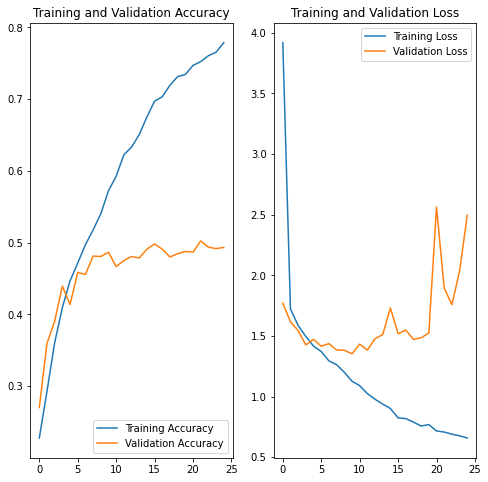

In [ ]:
from matplotlib import pyplot as plt
epochs = 25
def plot_acc_loss(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

plot_acc_loss(history, epochs)